In [33]:
!pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 660.6 kB/s eta 0:00:01
     ----------- --------------------------- 81.9/275.7 kB 1.2 MB/s eta 0:00:01
     ------------------ ------------------- 133.1/275.7 kB 1.1 MB/s eta 0:00:01
     ------------------ ------------------- 133.1/275.7 kB 1.1 MB/s eta 0:00:01
     -------------------------- --------- 204.8/275.7 kB 892.5 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 966.0 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 966.0 kB/s eta 0:00:01
     ---------------------------------- - 266.2/275.7 kB 966.0 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 707.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=d34d0b2382026fec492c4

In [39]:
!pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
    --------------------------------------- 10.2/456.2 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.2 kB 435.7 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/456.2 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/456.2 kB 393.8 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/456.2 kB 272.3 kB/s eta 0:00:02
   ------- ------------------------------- 81.9/456.2 kB 353.1 kB/s eta 0:00:02
   --------- ---------------------------- 112.6/456.2 kB 385.0 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.2 kB 385.0 kB/s eta 0:00:01
   ----------- -------------------------- 143.4/456.2 kB 340.5 kB/s eta 0:00:01
   -------------- ----------------------- 174.1/456.2 kB 388.2 kB/s eta 0:00:01
   -------------------- ----------------- 245.8/456.2 kB 502.2 kB/s eta 0:00:01
   -------------------- ----------------- 245.8/456.2 kB 

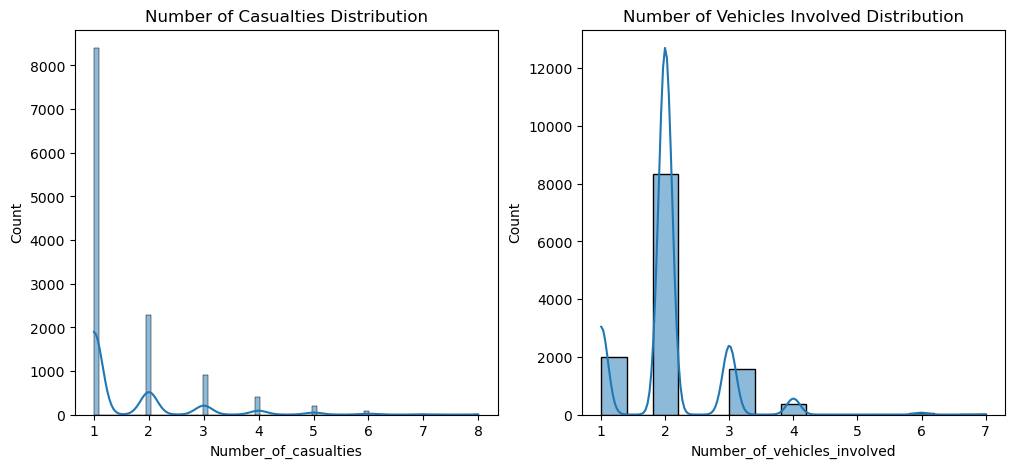

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load your Excel file into a DataFrame (replace 'your_file.xlsx' with your actual file name)
df = pd.read_excel('C:\\Users\\khomo\\Accident_Dataset.xlsx')

# Plot histograms
plt.figure(figsize=(12, 5))

# Histogram for Number of Casualties
plt.subplot(1, 2, 1)
sns.histplot(df['Number_of_casualties'], kde=True)
plt.title('Number of Casualties Distribution')

# Histogram for Number of Vehicles Involved
plt.subplot(1, 2, 2)
sns.histplot(df['Number_of_vehicles_involved'], kde=True)
plt.title('Number of Vehicles Involved Distribution')

plt.show()


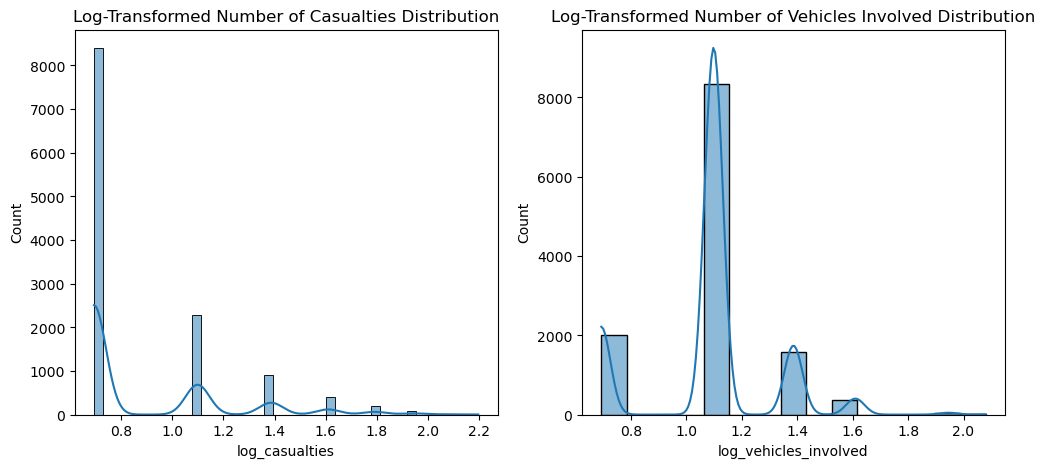

In [3]:
import numpy as np

# Apply log transformation with a constant to avoid zero values
df['log_casualties'] = np.log(df['Number_of_casualties'] + 1)
df['log_vehicles_involved'] = np.log(df['Number_of_vehicles_involved'] + 1)

# Plot histograms for log-transformed data
plt.figure(figsize=(12, 5))

# Histogram for log-transformed Number of Casualties
plt.subplot(1, 2, 1)
sns.histplot(df['log_casualties'], kde=True)
plt.title('Log-Transformed Number of Casualties Distribution')

# Histogram for log-transformed Number of Vehicles Involved
plt.subplot(1, 2, 2)
sns.histplot(df['log_vehicles_involved'], kde=True)
plt.title('Log-Transformed Number of Vehicles Involved Distribution')

plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a list of values to remove
values_to_remove = ['nan', 'na', 'NaN', 'Na', np.nan, '', '1770', '1585', 'Unknown']

# Dictionary to store mappings for each categorical column
mappings = {}

# Function to clean and encode categorical columns
def encode_categorical_columns(dataframe):
    for column in dataframe.select_dtypes(include=['object']).columns:
        dataframe.loc[:, column] = dataframe[column].astype(str)
        dataframe.loc[dataframe[column] == "normalnormal", column] = "Normal"
        for value in values_to_remove:
            dataframe.loc[dataframe[column] == value, column] = ''
        cleaned_values = dataframe[column].replace('', np.nan).dropna().unique()
        mapping = {value: idx + 1 for idx, value in enumerate(cleaned_values)}
        dataframe.loc[:, column] = dataframe[column].replace(mapping)
        mappings[column] = {v: k for k, v in mapping.items()}
    return dataframe

# Apply the function to the DataFrame
df_encoded = encode_categorical_columns(df)

# Handle the 'Casualty_severity' column specifically
if 'Casualty_severity' in df_encoded.columns:
    df_encoded.loc[:, 'Casualty_severity'] = df_encoded['Casualty_severity'].astype(str)
    for value in values_to_remove:
        df_encoded.loc[df_encoded['Casualty_severity'] == value, 'Casualty_severity'] = ''
    cleaned_severity_values = df_encoded['Casualty_severity'].replace('', np.nan).dropna().unique()
    severity_mapping = {value: idx + 1 for idx, value in enumerate(cleaned_severity_values)}
    df_encoded.loc[:, 'Casualty_severity'] = df_encoded['Casualty_severity'].replace(severity_mapping)
    mappings['Casualty_severity'] = {v: k for k, v in severity_mapping.items()}

# Display mappings in a table format
for column, mapping in mappings.items():
    if column != 'Time':
        print(f"\nMapping for column: {column}")
        for original_value, encoded_value in mapping.items():
            print(f"{original_value} -> {encoded_value}")



Mapping for column: Day_of_week
1 -> Monday
2 -> Sunday
3 -> Friday
4 -> Wednesday
5 -> Saturday
6 -> Thursday
7 -> Tuesday

Mapping for column: Age_band_of_driver
1 -> 18-30
2 -> 31-50
3 -> Under 18
4 -> Over 51

Mapping for column: Sex_of_driver
1 -> Male
2 -> Female

Mapping for column: Educational_level
1 -> Above high school
2 -> Junior high school
3 -> Elementary school
4 -> High school
5 -> Illiterate
6 -> Writing & reading

Mapping for column: Vehicle_driver_relation
1 -> Employee
2 -> Owner
3 -> Other

Mapping for column: Driving_experience
1 -> 1-2yr
2 -> Above 10yr
3 -> 5-10yr
4 -> 2-5yr
5 -> No Licence
6 -> Below 1yr
7 -> unknown

Mapping for column: Type_of_vehicle
1 -> Automobile
2 -> Public (> 45 seats)
3 -> Lorry (41?100Q)
4 -> Public (13?45 seats)
5 -> Lorry (11?40Q)
6 -> Long lorry
7 -> Public (12 seats)
8 -> Taxi
9 -> Pick up upto 10Q
10 -> Stationwagen
11 -> Ridden horse
12 -> Other
13 -> Bajaj
14 -> Turbo
15 -> Motorcycle
16 -> Special vehicle
17 -> Bicycle

Mappi

In [7]:
# Save the updated DataFrame to a new Excel file
output_file_path = 'C:\\Users\\khomo\\Accident_Dataset_Processed_2.xlsx'
df.to_excel(output_file_path, index=False)

# Confirm the save
print(f"Processed data saved to: {output_file_path}")


Processed data saved to: C:\Users\khomo\Accident_Dataset_Processed_2.xlsx


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load your encoded DataFrame
df_encoded = pd.read_excel('C:\\Users\\khomo\\Accident_Dataset_Processed.xlsx')

# Columns identified as categorical (even though they are numerical)
categorical_columns = [
    'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
    'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
    'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle',
    'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
    'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
    'Light_conditions', 'Weather_conditions', 'Type_of_collision',
    'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
    'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
    'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
    'Accident_severity'
]

# Columns identified as true numerical
numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']

# Remove rows with more than 30% missing values
threshold = int(df_encoded.shape[1] * 0.70)  # Set threshold to 70% of columns
df_encoded.dropna(thresh=threshold, inplace=True)

# Step 1: Fill missing values in categorical columns with mode
for column in categorical_columns:
    mode_value = df_encoded[column].mode()[0]  # Get the mode of the column
    df_encoded.loc[:, column] = df_encoded[column].fillna(mode_value)  # Fill NaNs with mode

# Step 2: Fill missing values in numerical columns with median
for column in numerical_columns:
    median_value = df_encoded[column].median()  # Get the median of the column
    df_encoded.loc[:, column] = df_encoded[column].fillna(median_value)  # Fill NaNs with median

# Step 3: Scale numerical columns
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Save the updated DataFrame to a new Excel file
output_file_path = 'C:\\Users\\khomo\\Accident_Dataset_Cleaned_2.xlsx'
df_encoded.to_excel(output_file_path, index=False)

# Confirm the save
print(f"Processed data saved to: {output_file_path}")

Processed data saved to: C:\Users\khomo\Accident_Dataset_Cleaned_2.xlsx


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the processed data
df_encoded = pd.read_excel('C:\\Users\\khomo\\Accident_Dataset_Cleaned_2.xlsx')

# Define the features and target ('Cause_of_accident' is now the target column)
# Specify the columns you want to use for prediction
feature_columns = [
    'Age_band_of_driver', 
    'Sex_of_driver', 
    'Vehicle_driver_relation', 
    'Driving_experience', 
    'Type_of_vehicle', 
    'Area_accident_occured', 
    'Lanes_or_Medians', 
    'Road_allignment', 
    'Types_of_Junction', 
    'Road_surface_conditions', 
    'Light_conditions', 
    'Vehicle_movement', 
    'Fitness_of_casuality'
]

X = df_encoded[feature_columns]  # Selected features
y = df_encoded['Cause_of_accident']  # Target

# Get feature names
feature_names = X.columns.tolist()

# Split the data into training and testing sets with a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (8603, 13), (8603,)
Testing set shape: (3687, 13), (3687,)


In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from lime.lime_tabular import LimeTabularExplainer

# Initialize and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train.values, y_train.values)  # Use .values to convert to Numpy arrays

# Make predictions
y_pred_dt = decision_tree.predict(X_test.values)  # Use .values to convert to Numpy arrays

# Evaluate the model
print("Decision Tree Classifier Results:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")

# LIME for Decision Tree
explainer_dt = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=np.unique(y_train),
    mode='classification'
)

# Example explanation for a single prediction
i = 0  # Index of the instance you want to explain
exp_dt = explainer_dt.explain_instance(X_test.values[i], decision_tree.predict_proba)
exp_dt.show_in_notebook(show_table=True)


Decision Tree Classifier Results:
              precision    recall  f1-score   support

           1       0.11      0.12      0.12       345
           2       0.05      0.05      0.05       120
           3       0.13      0.13      0.13       451
           4       0.15      0.18      0.16       503
           5       0.00      0.00      0.00        17
           6       0.04      0.06      0.05       122
           7       0.08      0.09      0.09       363
           8       0.08      0.07      0.07       229
           9       0.20      0.18      0.19       713
          10       0.04      0.04      0.04        50
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        17
          13       0.16      0.15      0.15       427
          14       0.02      0.02      0.02        47
          15       0.04      0.03      0.03        89
          16       0.02      0.02      0.02        48
          17       0.00      0.00      0.00    

In [161]:
# Initialize the LIME explainer
explainer_dt = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=np.unique(y_train),
    mode='classification'
)

# Define the number of instances to explain
num_instances = 10  # You can adjust this based on the number of instances you want to analyze

# Store explanations in a dictionary to keep track of feature importance
feature_importance = {}

# Loop through multiple instances to get explanations
for i in range(num_instances):
    exp_dt = explainer_dt.explain_instance(X_test.values[i], decision_tree.predict_proba)
    explanation = exp_dt.as_list()

    # Aggregate feature importance
    for feature, weight in explanation:
        if feature in feature_importance:
            feature_importance[feature] += abs(weight)  # Sum absolute weights for importance
        else:
            feature_importance[feature] = abs(weight)

    # Show individual explanation (optional, displays explanation for each instance)
    # exp_dt.show_in_notebook(show_table=True)

# Convert feature importance to a DataFrame for easier visualization
feature_importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display aggregated feature importance
print("Aggregated Feature Importance from LIME:")
print(feature_importance_df)

Aggregated Feature Importance from LIME:
                                 Feature  Importance
6           Fitness_of_casuality <= 1.00    0.284193
1               Light_conditions <= 1.00    0.141521
13                 Sex_of_driver <= 1.00    0.079629
11         Area_accident_occured <= 2.00    0.058548
7                Road_allignment <= 1.00    0.047793
3               Vehicle_movement <= 1.00    0.047677
10             Types_of_Junction <= 1.00    0.038540
26              Types_of_Junction > 2.00    0.035691
14       Road_surface_conditions <= 1.00    0.035552
17       Vehicle_driver_relation <= 1.00    0.027414
16              Lanes_or_Medians <= 1.00    0.026358
15     2.00 < Driving_experience <= 3.00    0.024040
24       3.00 < Lanes_or_Medians <= 6.00    0.023738
0             Driving_experience <= 2.00    0.022584
18             Driving_experience > 4.00    0.020106
2                 Type_of_vehicle > 9.00    0.019734
21               Type_of_vehicle <= 1.00    0.016755
9    

 99%|===================| 69695/70053 [01:39<00:00]        

Shape of SHAP values array: (3687, 13, 19)
Length of feature names: 13
Length of mean overall SHAP values: 13


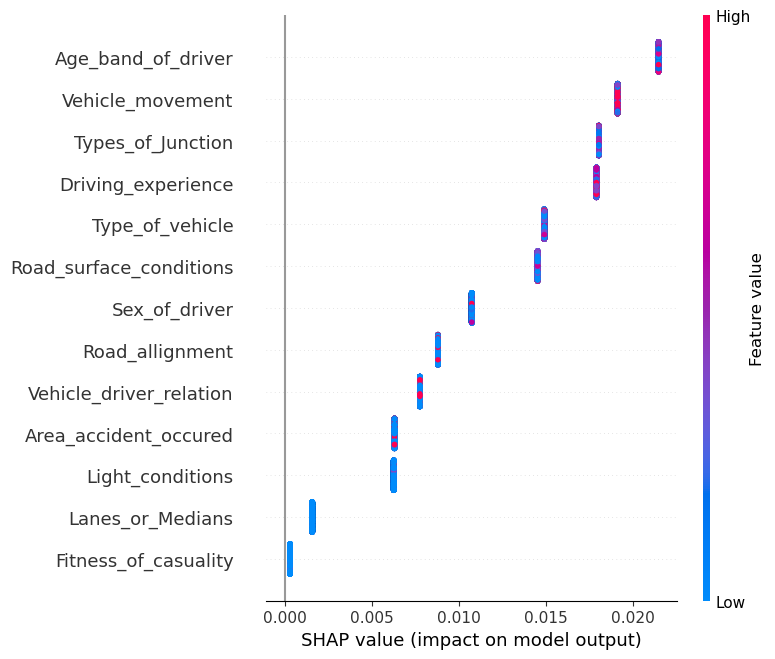

In [153]:
import shap
import pandas as pd
import numpy as np

# Initialize the SHAP explainer
explainer_dt = shap.Explainer(decision_tree, X_train)

# Calculate SHAP values for the test set
shap_values_dt = explainer_dt(X_test)

# Get the shape of SHAP values for debugging
print("Shape of SHAP values array:", shap_values_dt.values.shape)  # Expected shape: (n_samples, n_features, n_classes)

# Calculate the mean absolute SHAP values for each feature across all samples and classes
mean_abs_shap = np.abs(shap_values_dt.values).mean(axis=0)  # Shape: (n_features, n_classes)

# Now, compute the mean across all classes to get overall importance
mean_overall_shap = mean_abs_shap.mean(axis=1)  # Shape: (n_features,)

# Check lengths for debugging
print("Length of feature names:", len(feature_names))
print("Length of mean overall SHAP values:", len(mean_overall_shap))

# Ensure feature_names has the correct number of elements
if len(feature_names) != len(mean_overall_shap):
    raise ValueError(f"Length of feature names ({len(feature_names)}) does not match length of SHAP values ({len(mean_overall_shap)}).")

# Prepare SHAP values for summary plot
# Create a matrix for plotting where each feature's mean SHAP value is replicated across all samples
shap_values_matrix = np.tile(mean_overall_shap, (shap_values_dt.shape[0], 1))  # Shape: (n_samples, n_features)

# Create a DataFrame for plotting
mean_overall_shap_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean SHAP Value': mean_overall_shap
}).sort_values(by='Mean SHAP Value', ascending=False)

# Plotting the aggregated SHAP values for all classes
shap.summary_plot(shap_values_matrix, 
                  features=X_test,  # Pass original features to get colors right
                  feature_names=mean_overall_shap_df['Feature'].values, 
                  title="Overall SHAP Summary for Cause of Accident",
                  max_display=len(feature_names))


the figure abovershows us a SHAP summary plot which gives us a clear look at which factors play the biggest roles in predicting the traffic violations or cause of accidents. By analysing the impact of each feature on the model’s decisions, we can understand which areas are most important for us to minimize accidents. We’ve grouped these factors into three categories: the most influential, moderately influential, and less influential features, as outlined below.

Key Factors Causing Accidents:

Age of driver: This feature had the highest impact on predicting accident causes. Different age groups may have varied risk factors, such as younger drivers likely being more prone to risky driving behaviours and older drivers likely facing slower reaction times.
Movement of vehicle: The type of movement (e.g., turning, reversing, going straight) is another factor influencing cause of accidents. Movements like turning or crossing at intersections are often associated with higher accident risks due to increased exposure to other vehicles.
Types of junctions: Types of junctions was analysed as one of the key factors that influence the cause of accidents. The type of junction where the accident occurs is very important. Complex junctions, such as intersections and roundabouts, may lead to more accidents due to multiple points of conflict and varying driver expectations.
Experience of the driver: Less experienced drivers are more likely to be involved in accidents, likely due to limited hazard perception skills, overconfidence, or slower reaction times.
Type of vehicle: Different vehicle types contribute differently to accident causes. For example, motorcycles may have higher accident risks in certain situations, while larger vehicles like trucks can cause more severe accidents due to their size and weight.
Moderately Contributing Factors:
Road surface conditions: Conditions like wet and roads having potholes contribute to accident causes by affecting vehicle control. Slippery or uneven roads increase accident risk by making vehicles harder to control.
Sex of the driver: Gender differences in accident causes may stem from distinct driving styles or risk behaviours. For instance, some studies suggest that males may be involved in more severe accidents, while females may be more involved in low-speed collisions (Ulfarsson and Mannering, 2004).
Road alignment: Curves and bends in the road increase accident risk by reducing visibility and creating opportunities for loss of control, especially in adverse conditions.
Relation of vehicle to the driver: Whether the driver is the vehicle owner, or an employee can influence driving behaviour. Non-owners may exhibit less cautious driving due to the vehicle not being theirs.
Area accident occurred: Area where accidents happened does influence the cause of accidents, it’s not as high as others, but it does have a bit of an effect especially areas where there is always traffic or busy.
Light conditions: Poor lighting conditions increase the likelihood of accidents by reducing visibility. Although light conditions do have an effect in accidents, however, it is not main factor that influences cause of accidents.
Lesser Contributing Factors:
Lanes or median: The structures of lanes of presence or medians does not influence what causes traffic violations that much.
Fitness of casuality: Although this has a smaller impact, the physical condition of individuals involved in an accident might provide context for accident causes in certain scenarios, like driver fatigue or medical conditions.


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)  # Increased max_iter
log_reg.fit(X_train_scaled, y_train.values)

# Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr, zero_division=0))  # Handle undefined metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")


# LIME for Logistic Regression
explainer_lr = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=np.unique(y_train),
    mode='classification'
)

# Example explanation for a single prediction
i = 1  # Change this index to explain different instances
exp_lr = explainer_lr.explain_instance(X_test.values[i], log_reg.predict_proba)
exp_lr.show_in_notebook(show_table=True)


Logistic Regression Results:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       345
           2       0.00      0.00      0.00       120
           3       0.00      0.00      0.00       451
           4       0.12      0.09      0.10       503
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00       122
           7       0.00      0.00      0.00       363
           8       0.00      0.00      0.00       229
           9       0.19      0.90      0.32       713
          10       0.00      0.00      0.00        50
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00       427
          14       0.00      0.00      0.00        47
          15       0.00      0.00      0.00        89
          16       0.00      0.00      0.00        48
          17       0.00      0.00      0.00        2

In [165]:
# Initialize the LIME explainer
explainer_lr = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=np.unique(y_train),
    mode='classification'
)

# Define the number of instances to explain
num_instances = 10  # You can adjust this based on the number of instances you want to analyze

# Store explanations in a dictionary to keep track of feature importance
feature_importance = {}

# Loop through multiple instances to get explanations
for i in range(num_instances):
    exp_lr = explainer_lr.explain_instance(X_test.values[i], log_reg.predict_proba)
    explanation = exp_lr.as_list()
    # Aggregate feature importance
    for feature, weight in explanation:
        if feature in feature_importance:
            feature_importance[feature] += abs(weight)  # Sum absolute weights for importance
        else:
            feature_importance[feature] = abs(weight)
    # Show individual explanation (optional, displays explanation for each instance)
    # exp_lr.show_in_notebook(show_table=True)

# Convert feature importance to a DataFrame for easier visualization
feature_importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display aggregated feature importance
print("Aggregated Feature Importance from LIME:")
print(feature_importance_df)


Aggregated Feature Importance from LIME:
                                 Feature  Importance
2                Road_allignment <= 1.00    0.065727
13       Road_surface_conditions <= 1.00    0.054319
0             Age_band_of_driver <= 1.00    0.050636
12         Area_accident_occured <= 2.00    0.049290
21       3.00 < Lanes_or_Medians <= 6.00    0.041101
10              Lanes_or_Medians <= 1.00    0.030405
17             Driving_experience > 4.00    0.023819
7               Light_conditions <= 1.00    0.020749
11             Age_band_of_driver > 2.00    0.019335
1             Driving_experience <= 2.00    0.018480
14             Types_of_Junction <= 1.00    0.017900
3         Road_surface_conditions > 1.00    0.013553
19     1.00 < Age_band_of_driver <= 2.00    0.012338
4   4.00 < Area_accident_occured <= 5.00    0.011680
9               Vehicle_movement <= 1.00    0.010656
24              Types_of_Junction > 2.00    0.010163
22     3.00 < Driving_experience <= 4.00    0.009259
20   

Shape of overall_mean_shap array: (13,)
Length of feature names: 13


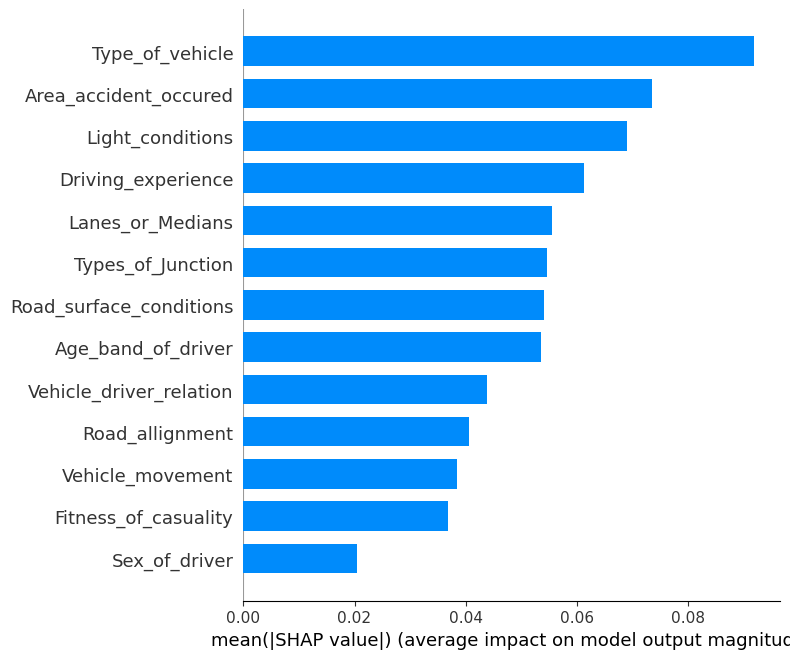

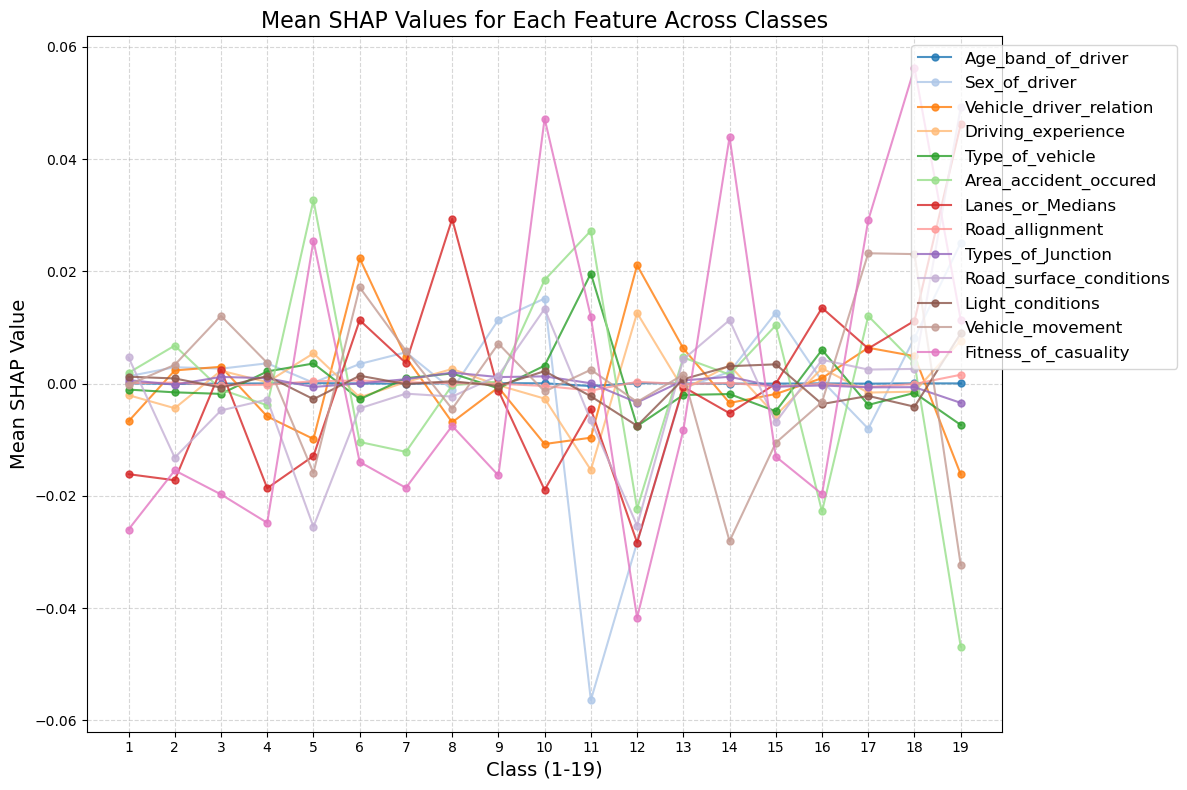

In [213]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean absolute SHAP values across both samples and classes
overall_mean_shap = np.abs(shap_values_lr.values).mean(axis=(0, 2))  # Mean across sample and class dimensions

# Confirming shapes for alignment
print(f"Shape of overall_mean_shap array: {overall_mean_shap.shape}")  # Expected to be (13,)
print(f"Length of feature names: {len(feature_columns)}")  # Expected to be 13

# Ensure that the length of feature names matches the mean SHAP values
if overall_mean_shap.shape[0] != len(feature_columns):
    raise ValueError(f"Length of feature names ({len(feature_columns)}) does not match SHAP values ({overall_mean_shap.shape[0]}).")

# Plotting the SHAP bar plot to show overall mean feature importance across all classes
shap.summary_plot(
    overall_mean_shap.reshape(1, -1),  # Reshape for compatibility with summary_plot
    features=np.zeros((1, len(feature_columns))),  # Dummy feature values
    feature_names=feature_columns,
    plot_type="bar",
    title="Overall Mean SHAP Importance for Cause of Accident",
    max_display=len(feature_columns)
)

# Calculate mean SHAP values across samples for each feature and class
mean_shap_per_class = shap_values_lr.values.mean(axis=0)  # Shape: (n_features, n_classes)

# Create the plot
plt.figure(figsize=(12, 8))  # Increase figure size for better spacing

# Define a list of distinct colors (using tab20)
distinct_colors = plt.get_cmap('tab20').colors[:13]  # Get 13 distinct colors from tab20 colormap

# Plot each feature's mean SHAP value for each class
for i, feature_name in enumerate(feature_columns):
    plt.plot(
        range(mean_shap_per_class.shape[1]),
        mean_shap_per_class[i, :],
        label=feature_name,
        marker='o',              # Add markers for clarity
        markersize=5,            # Size of the markers
        alpha=0.8,               # Adjust transparency
        color=distinct_colors[i]  # Assign unique color
    )

# Enhance the plot
plt.xlabel("Class (1-19)", fontsize=14)  # Update label to indicate range
plt.ylabel("Mean SHAP Value", fontsize=14)
plt.title("Mean SHAP Values for Each Feature Across Classes", fontsize=16)
plt.xticks(range(mean_shap_per_class.shape[1]), [str(i + 1) for i in range(mean_shap_per_class.shape[1])])  # Change labels to 1-19
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)  # Add grid for better visibility

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


C:\Users\khomo\AppData\Local\Temp\ipykernel_7228\2591345805.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_encoded.groupby('Cause_of_accident')[feature_columns].mean()


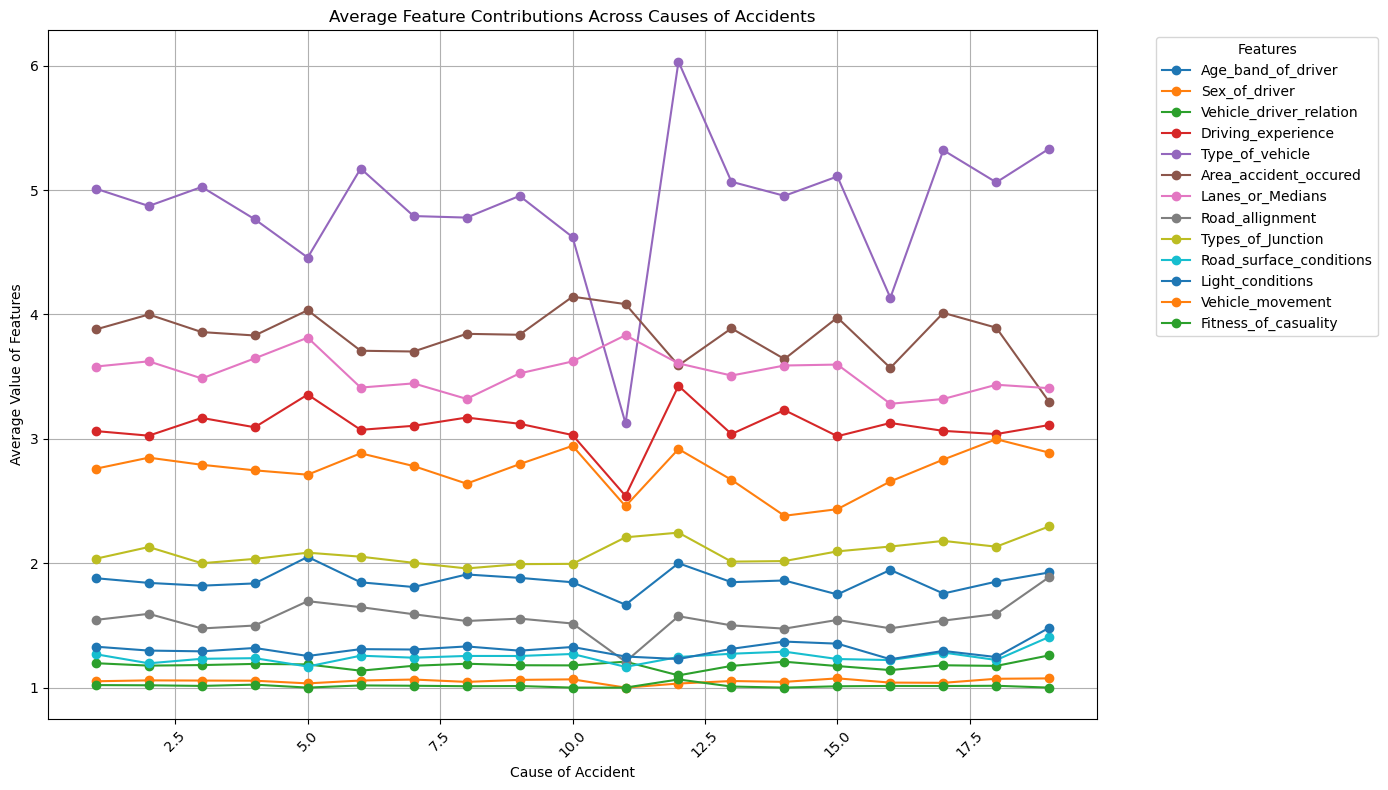

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed data
df_encoded = pd.read_excel('C:\\Users\\khomo\\Accident_Dataset_Cleaned_2.xlsx')

# Define the features and target ('Cause_of_accident' is now the target column)
feature_columns = [
    'Age_band_of_driver', 
    'Sex_of_driver', 
    'Vehicle_driver_relation', 
    'Driving_experience', 
    'Type_of_vehicle', 
    'Area_accident_occured', 
    'Lanes_or_Medians', 
    'Road_allignment', 
    'Types_of_Junction', 
    'Road_surface_conditions', 
    'Light_conditions', 
    'Vehicle_movement', 
    'Fitness_of_casuality'
]

# Add the target column
df_encoded['Cause_of_accident'] = df_encoded['Cause_of_accident'].astype('category')

# Group by 'Cause_of_accident' and calculate the mean for each feature
mean_values = df_encoded.groupby('Cause_of_accident')[feature_columns].mean()

# Plotting the line graph
plt.figure(figsize=(14, 8))
for feature in feature_columns:
    plt.plot(mean_values.index, mean_values[feature], marker='o', label=feature)

plt.title('Average Feature Contributions Across Causes of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Average Value of Features')
plt.xticks(rotation=45)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()
